# SCS 3546 Week 7 - Deep Models for Text


## Learning Objectives

- Develop familiarity with several of the key concepts in Deep Learning models for NLP
- Work with word and document embeddings
- Build knowledge of how seq2seq models can be used for NLP tasks
- Develop hands-on experience with a classification task (Sentiment Analysis: Positive/Negative) of IMDB reviews
- Learn to use TensorBoard and save a trained model
- Understand how Neural Machine Translation works

## Applications of Deep Models
- Text Classification and Categorization
- Named Entity Recognition
- Part of Speech Tagging
- Semantic Parsing and Query Answering
- Summarization
- Paraphrasing Detection
- Synonym generation for search
- Machine Translation

## Word Embeddings

### Encoding with Integers

As we discussed last week, the traditional method of encoding words was to start by assigning an integer index to each unique word in the vocabulary then create vectors of a length equal to the size of the vocabulary:

- word encoding: all entries zero except the one at the index of the word, which was set to 1
- document encoding: each entry one (or a count of the number of occurrences) if the word is present in the document or zero if not

This has several advantages:

- Every word is represented by an integer that can be used as a fast look up index to additional information about the word (such as its text string)
- Every word vector is a fixed-sized data structure which makes them easier to process
- Comparing two words for equality is very fast
- We can compare the similarity of documents using techniques such as TF-IDF and cosine similarity

There are several things about this that are less than ideal:

- The vectors don't capture any word meaning
- The order of the words is arbitrary
- The vectors are large and therefore wasteful of computer memory and CPU
- Vectors with continuous (floating point) values are more amenable to use with neural nets than those with discrete values

We would prefer an approach where:

- Words that are close together in their encodings are similar in some sense
- The vectors are short and dense rather than long and sparse
- The vectors capture some aspect of the meaning of the words
- The different uses of a particular token (e.g. "bow" as in "bow and arrow" and "bow of a ship") can be disambiguated
- The vectors are more amenable for use with neural nets

If we could find such an encoding, then we could use the vectors for:

- Classifying the document as being about a topic without having to compare it to others already associated with a topic
- Measure the sentiment of a document without having to hand-engineer sentiment ratings for each word in the vocabulary
- Use the meaning of words and sentences to provide better automated translation

### Word Similarity

- To come up with such an encoding we need some notion of *word similarity*
- This is different than *document similarity* we've already discussed
- WordNet is a database that captures some of this information: synonyms, hyponyms (one word's meaning is a more specific case of another's)
- One way we could do it is ask people to rate the similarity of pairs of words
- But it isn't at all clear how to compare words like "bunny" and "two"
- What are the relevant features/dimensions on which to compare two words?
- A key strength of neural nets is their ability to discover relevant features so we don't need to engineer them ourselves
- We'd like to use their talent for unsupervised learning to learn a representation that has the advantages above
- We'll make use of the distributional hypothesis (the observation that related words occur close together in text) to give us a similarity measure: we will consider words that are used in similar contexts to be *similar*

### Word Embeddings

- Once we have a similarity measure we can bring other techniques we know into play to reduce the size of the vector:
  - Clustering
  - Dimensionality reduction (Principal Components Analysis, Singular Value Decomposition, etc.)
- These kinds of techniques will discover useful dimensions for comparison based on similarity of the contexts in which the words are used (but as usual will likely be somewhat alien dimensions: linear combinations of things we might or might not think of)
- We call such dense vectors that encode the meaning of words in a smaller number (low hundreds) of dimensions *word embeddings*
- They are a form of *distributed representation* because the meaning is encoded thoughout the entire vector

### Popular Embeddings

The most famous word embeddings are:
- **GloVe**
    - GloVe, coined from Global Vectors, developed as an open-source project at **Stanford**
- **Word2Vec**
    - Word2vec was created by a team of researchers led by Tomas Mikolov at **Google**
- **FastText**
    - FastText is a library for learning of word embeddings and text classification created by **Facebook**'s AI Research (FAIR) lab which extends Word2Vec


The following section introduces `Word2Vec` and its implementation in `Gensim`. [Gensim](https://radimrehurek.com/gensim/index.html) is an open source Python library for natural language processing, with a focus on topic modeling. To use Gensim, install it in your Terminal or Command Line as follows:

`conda install gensim`

### Word2Vec

In Word2Vec, vectors represent relative position between each two words. Training your own word vectors may be the best approach for a given NLP problem, but it can take a long time, a fast computer with a huge RAM and disk space, and perhaps you need expertise in finessing the input data and training algorithm. An alternative is to simply use an existing pre-trained word embedding such as `GoogleNews-vectors-negative300`.

A simple way to understand this is to look at the following image by creating the Word2Vec vectors of words and project them into 2D plane as follows:

1. Loading a pre-trained word2vec embedding (e.g. download and extract [GoogleNews-vectors-negative300.bin.gz](https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz). The extracted file is 3.4 Gigabytes.)
2. Finding similar words and appending each of the similar words embedding vector to the matrix
3. Applying TSNE to the Matrix to project each word to a 2D space (i.e. dimension reduction)
4. Ploting the 2D position of each word with a label



In [5]:
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# load pre-trained word2vec embeddings
from gensim.test.utils import common_texts, get_tmpfile
# Load Google's pre-trained Word2Vec model - 3.4 GB! 
#You should download and extract the file beside this notebook
#!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
#It takes around a minute to load the file
model = gensim.models.KeyedVectors.load_word2vec_format('~/Downloads/GoogleNews-vectors-negative300.bin', binary=True)  

<IPython.core.display.Javascript object>


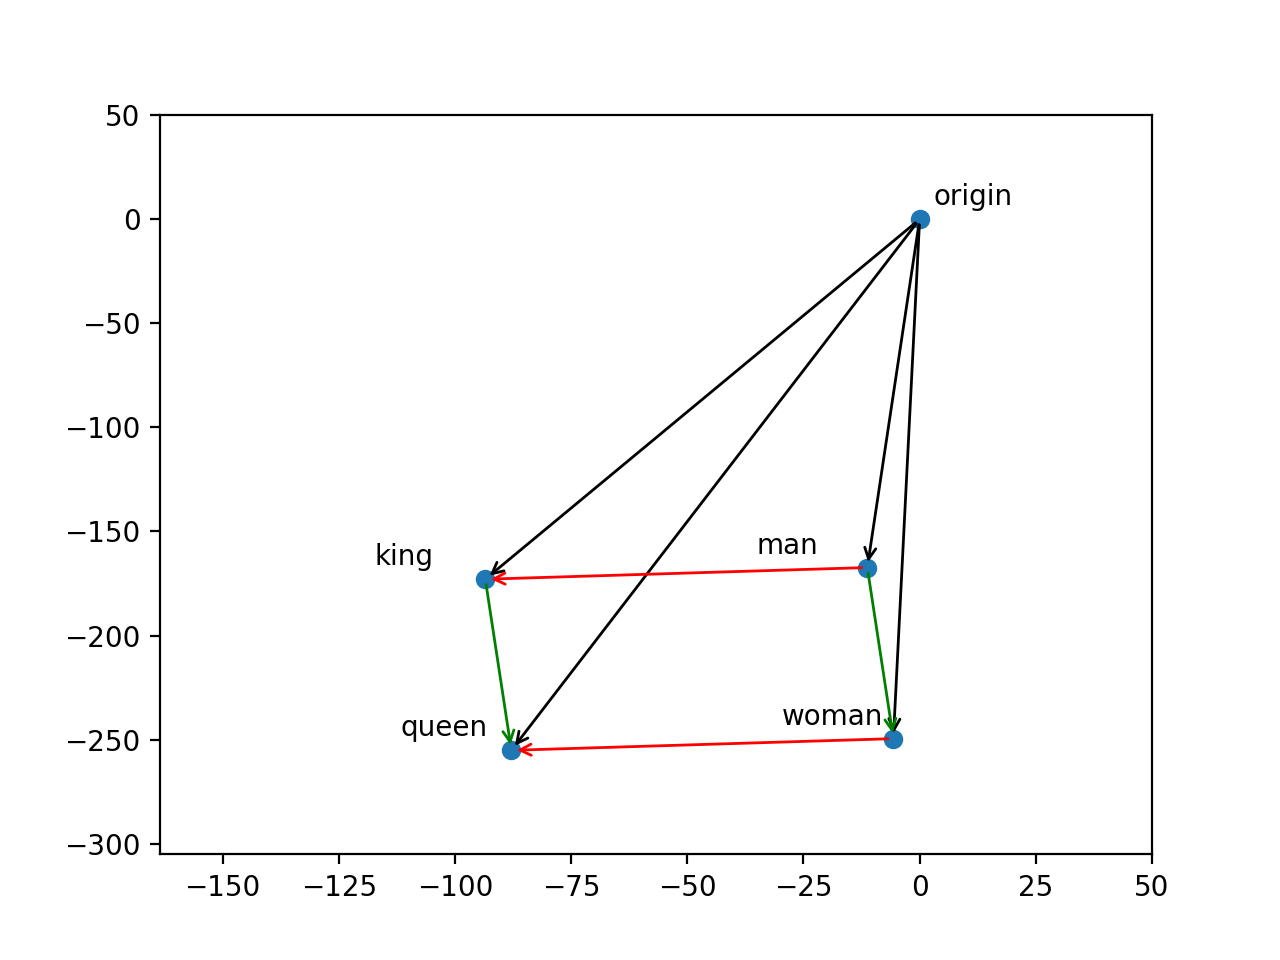

Text(-87.85121154785156, -255.13087463378906, '')

In [6]:
def display_word_list_tsnescatterplot(model, word_list):
    
    arr = np.empty((0,300), dtype='f')

    # get close words    
    # add the vector for each of the words to the array
    #arr = np.empty([30,2])
    word_labels = list()
    for wrd_score in word_list:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0:])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    #Adding origin
    x_coords = np.append(x_coords,0)
    y_coords = np.append(y_coords,0)

    # display scatter plot
    plt.scatter(x_coords, y_coords)
    plt.annotate('origin', xy=(0, 0), xytext=(5, 5), textcoords='offset points')
    list_xy = []
    for label, x, y in zip(word_labels, x_coords, y_coords):
        list_xy.append((x,y))
        plt.annotate(label, xy=(x, y), xytext=(-40, 5), textcoords='offset points')
        plt.annotate(
        '',
        xy=(0, 0),
        xycoords='data',
        xytext=(x, y),
        textcoords='data',
        horizontalalignment='center',
        arrowprops=dict(facecolor='black', arrowstyle="<-"))
    
    
    
    plt.xlim(x_coords.min()-70, x_coords.max()+50)
    plt.ylim(y_coords.min()-50, y_coords.max()+50)
    plt.show()
    return (list_xy)

word_list = ["man", "woman" , "king", "queen"]
#word_list = ["boy", "girl" , "king", "queen"]
#word_list = ["walking", "swimming" , "walked", "swam"]
list_xy=display_word_list_tsnescatterplot(model,word_list)

plt.annotate(
        '',
        xy=list_xy[0],
        xycoords='data',
        xytext=list_xy[2],
        textcoords='data',
        horizontalalignment='center',
        arrowprops=dict(color='red', arrowstyle="<-"))
plt.annotate(
        '',
        xy=list_xy[1],
        xycoords='data',
        xytext=list_xy[3],
        textcoords='data',
        horizontalalignment='center',
        arrowprops=dict(color='red', arrowstyle="<-"))

plt.annotate(
        '',
        xy=list_xy[0],
        xycoords='data',
        xytext=list_xy[1],
        textcoords='data',
        horizontalalignment='center',
        arrowprops=dict(color='green', arrowstyle="<-"))
plt.annotate(
        '',
        xy=list_xy[2],
        xycoords='data',
        xytext=list_xy[3],
        textcoords='data',
        horizontalalignment='center',
        arrowprops=dict(color='green', arrowstyle="<-"))


The interesting properties of Word2Vec model is that you can do is doing linear algebra arithmetic with words. For example, a popular example described in lectures and introduction papers is:

`queen = (king - man) + woman`

You can also take a look at the result by changing man to boy and woman to girl and we also have:

`queen = (king - boy) + girl`

In addition to the names, you can apply it to the verbs:

`walking = (walked - swam) + swimming`

Figure below shows this property by these examples:

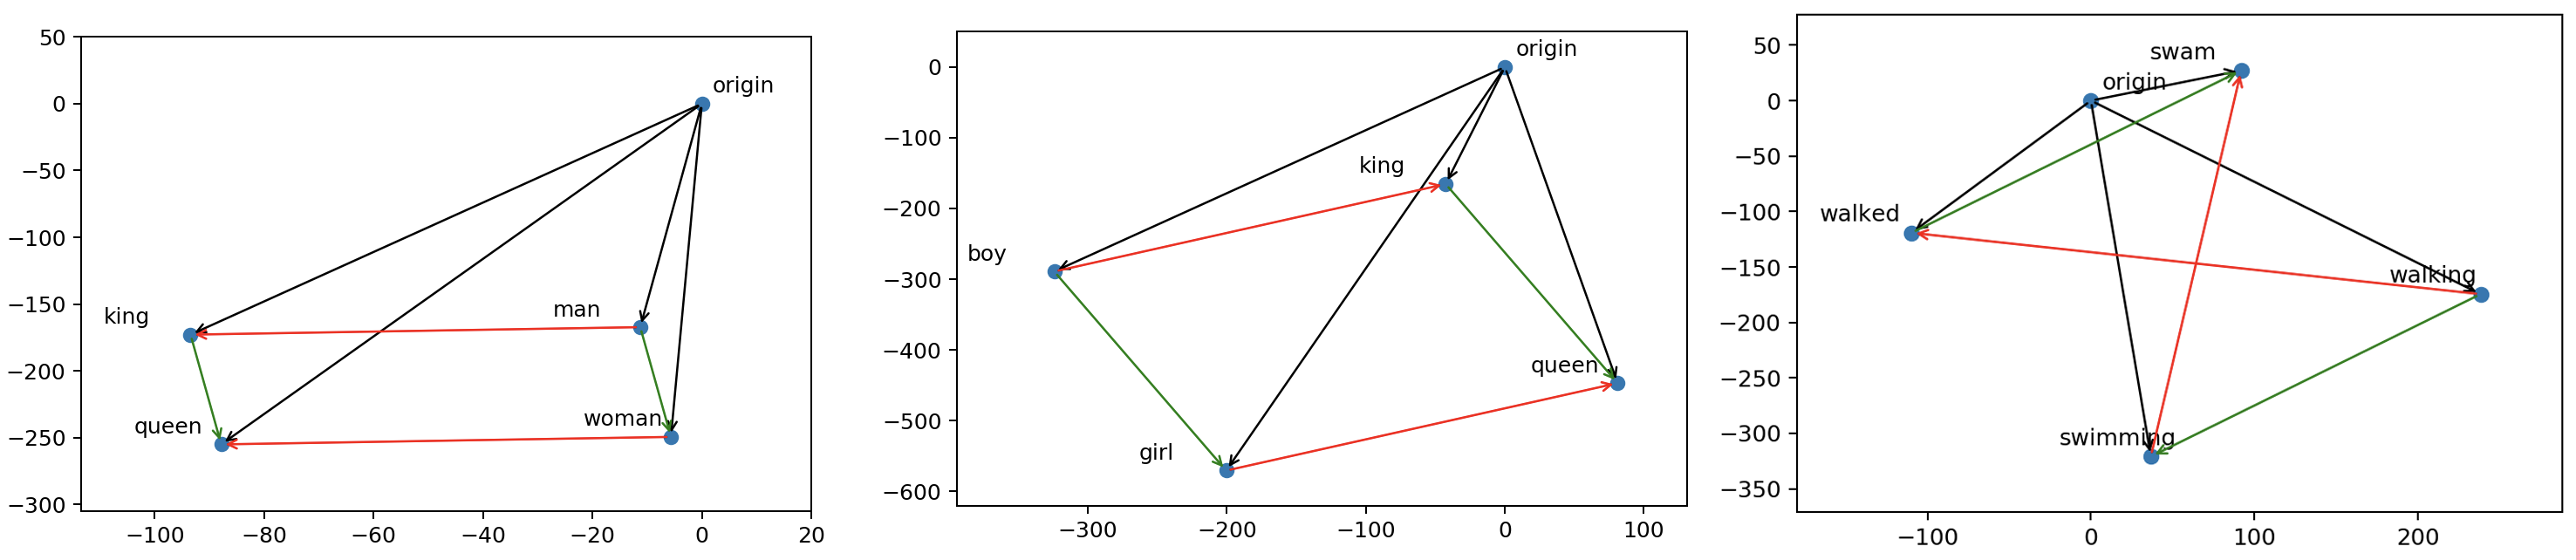

### How Word2vec Skipgram works
- We wish to find the probability distribution of each of the vocabulary words of appearing in a window of a fixed size on either side of a given ("centre" or "focus") word

![Window](img/training_data.png)

- The only parameter in the model is the vector representation of the words (the window size is a hyperparameter)
- If O is the event of a word occuring anywhere in the window and C is the event of having a particular centre word, we wish to find $$P(O|C) = \exp(u_O^Tv_C)/\sum_{w=1}^V\exp(u_w^Tv_C)$$ where u and v are the vector representations and V is the size of the vocabulary

![Skipgram](img/skip_gram_net_arch.png)

- We train a logistic classifier to predict this probability, then use the output weights as our representation
- To speed the process up (the computation in the denominator is huge) we use negative sampling and train examples of actual window words with a small number of negative examples (randomly chosen words paired with the centre word)

## Libraries supporting Word2vec

- Gensim
  - Free Python library for topic modelling
- DeepLearning4J
  - Java deep learning library
- FastText
  - The website has downloadable pre-trained word vectors for over 150 languages and C++ code for document classification
  - FastText can find words that are similar to even misspelled words or words that are not in the dictionary but have substring (subword) similarity to known words
  - Skipgram performs better for this task

## Sentiment analysis of Movie Reviews Using Deep Learning

In [7]:
import warnings
warnings.filterwarnings('ignore') # to remove warnings
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML # print colorful output and compile html tags
%matplotlib inline 

import numpy as np
import re
import tensorflow as tf
print("TensorFlow Version: " + tf.__version__) # Make sure your TenorFlow version => 1.11.0
from tensorflow import keras
print("Keras Version: " + tf.keras.__version__) # Make sure your tf.keras version => 2.1.6-tf

TensorFlow Version: 1.10.0
Keras Version: 2.1.6-tf


In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

## Split Train/Test
We use a `50%/50%` split of the dataset into training and test. This is a good standard split methodology.


In [9]:
np.random.seed(12345)
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
(all_X_train, _), (all_X_valid, _) = imdb.load_data() # For all review words

#Whole dataset by concating train and test
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

17465344/17464789 [==============================] - 6s 0us/step


In [10]:
# Summarize number of words
print("Number of unique words in whole data set: ")
print(len(np.unique(np.hstack(X))))
print("Number of unique words in training set: ")
print(len(np.unique(np.hstack(X_train))))
print("Number of unique words in test set: ")
print(len(np.unique(np.hstack(X_test))))

Number of unique words in whole data set: 
4998
Number of unique words in training set: 
4998
Number of unique words in test set: 
4997


In [11]:
print("Number of records in Whole dataset: " + str (X.shape))
print("Number of records in Train set: " + str (X_train.shape))
print("Number of records in Test set: " + str (X_test.shape))
print("Classes: " + str(np.unique(y)))

Number of records in Whole dataset: (50000,)
Number of records in Train set: (25000,)
Number of records in Test set: (25000,)
Classes: [0 1]


In [12]:
print(X_train[:1])
print(y_train[:1])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])]
[1]


In [13]:
print(X_test[:1])
print(y_test[:1])

[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 1668, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717])]
[0]


## Restore words from Index

This section helps you to see the actual reviews. Words with the indexes 0, 1 and 2 will be represented as PAD, START and UNK (i.e. unknown). Remember that we are not loading the full reviews, but only 5000 unique words per review and limiting a review length to 100. It will all make more sense once we pre-process the data. Fo now, let’s have a look at what we have as content for the first review:

In [14]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY 
# (given by keras...need to do nothing to create it)
# v+3 is the key correction necessary for the imdb dataset in Keras
review_ix = 44
word_index =  imdb.get_word_index()
# v+3 so we push the words 3 positions.
word_index = {k : (v+3) for k,v in word_index.items()}

# Now we fill in some keywords for the first 3 indexes as seen below.
word_index['<span style="color:blue;">PAD</span>'] = 0
word_index['<b style="color:green;">START</b>'] = 1
word_index['<b style="color:red;">UNK</b>'] = 2

index_word = {v: k for k, v in word_index.items()}
review = ' '.join(index_word[id] for id in X_train[review_ix])
#print(review)

count = len(re.findall(r'\s+', re.sub('<[^<]+?>', '', review)))
print (count+1)
display(HTML(review))

1646592/1641221 [==============================] - 0s 0us/step
122


If you want to compare it with the full review, try the following:

In [15]:
full_review = ' '.join(index_word[id] for id in all_X_train[review_ix])
display(HTML(full_review))

In [16]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [17]:
review = ' '.join(index_word[id] for id in X_train[review_ix])
display(HTML(review))
count = len(re.findall(r'\s+', re.sub('<[^<]+?>', '', review))) # number of spaces between each two words in raw padded text
display(HTML("<br><b>Number of words in padded sequence:</b> " +  str(count+1))) # number of words = number of spaces among them + 1

In [18]:
embedding_vector_length = 35
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 35)           175000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               54400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 229,501
Trainable params: 229,501
Non-trainable params: 0
_________________________________________________________________
None


### TensorBoard Architecture Visualization
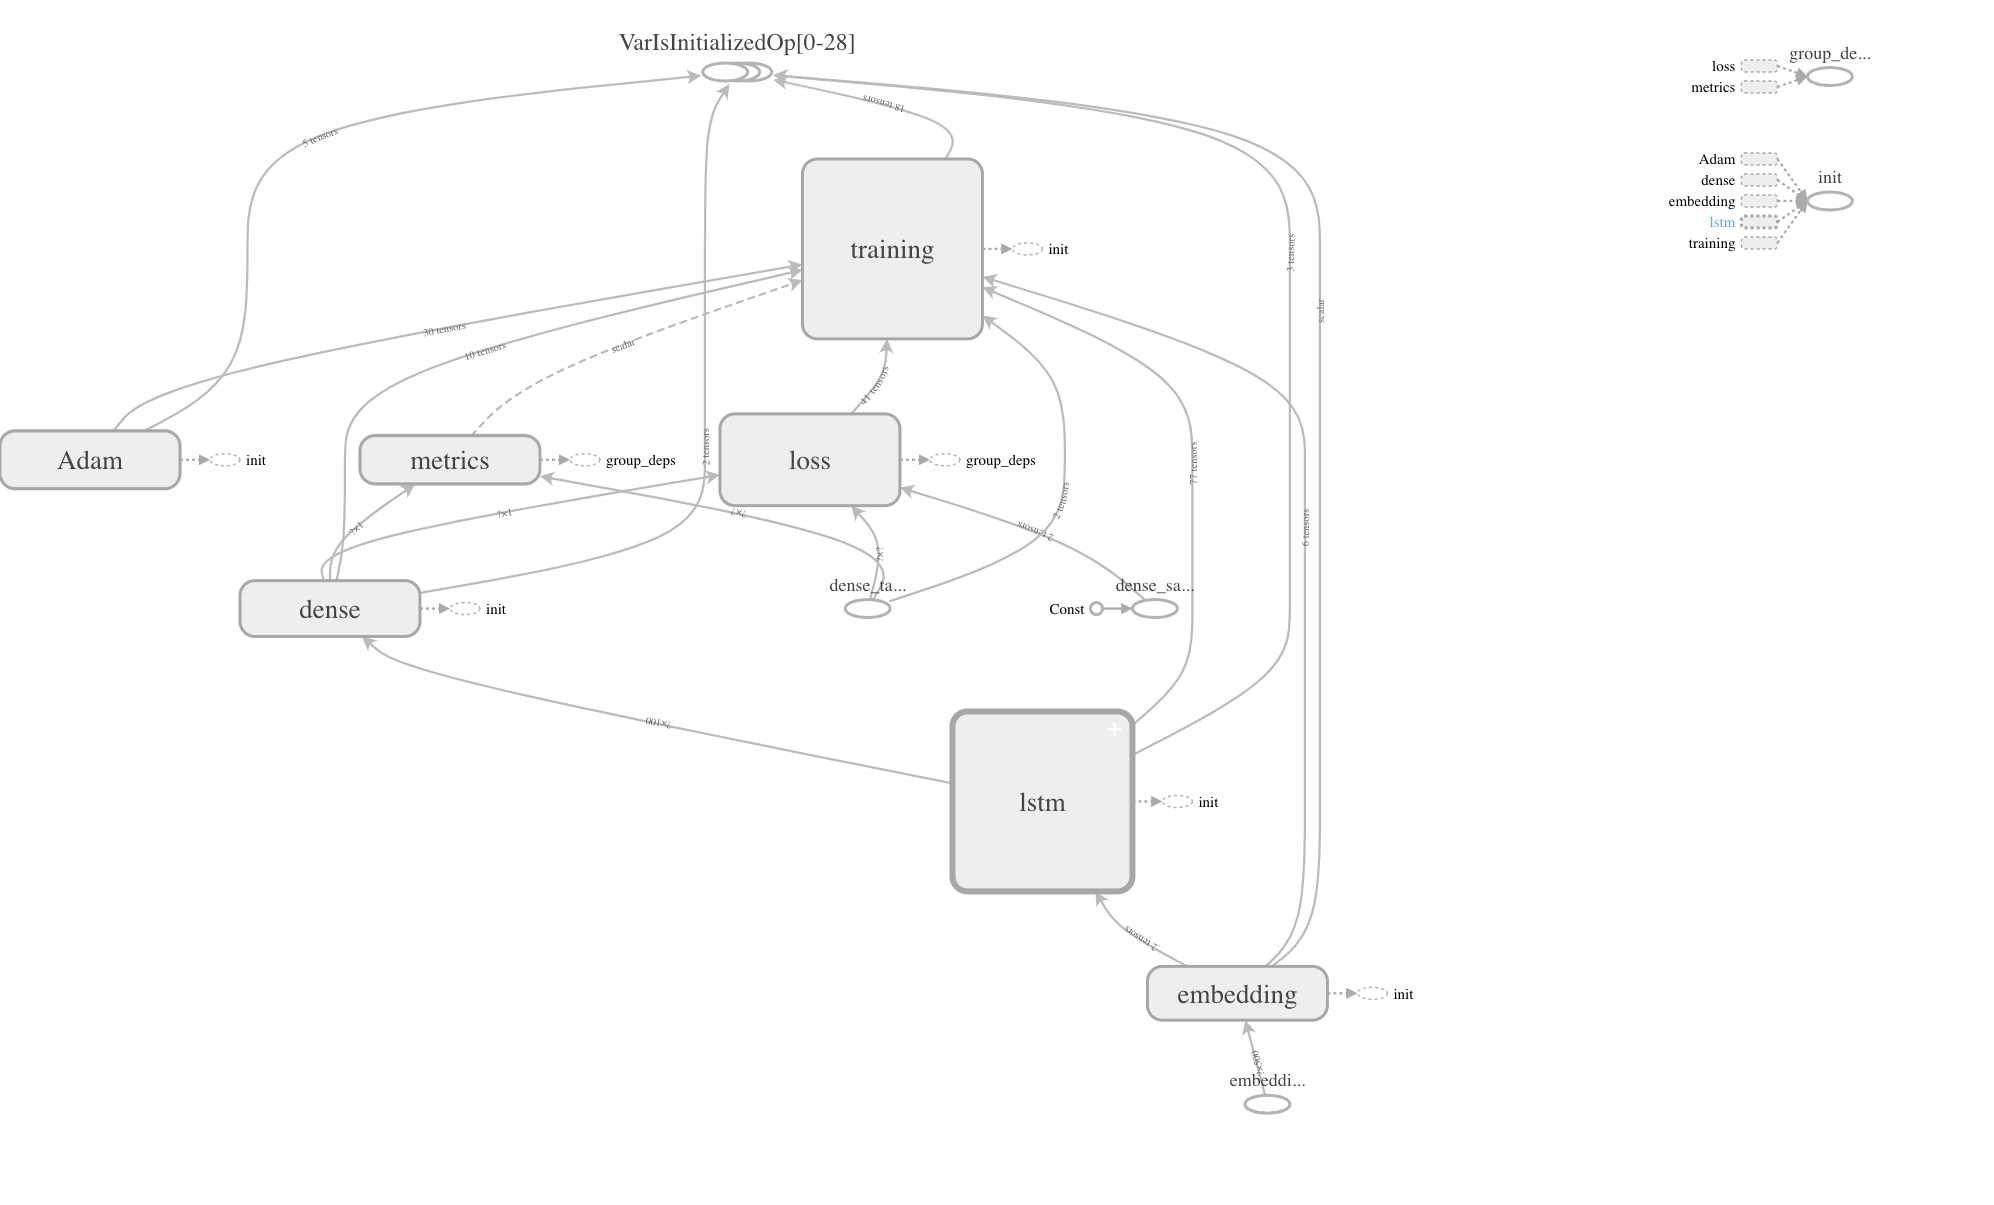

## Training the model

You can see the graphs on **TensorBoard** after running the following lines.  Run your code and check whether your graph folder is there in your working directory. If the following codes work correctly you will have "Graph" folder in your working directory (beside this Jupyter Notebook).

### TensorBoard
**Note:** To see the TensorBoard you need to open your terminal or command line, `CD` (change directory) to the same directory that this Jupyter Notebook is in, and run the following command:

`> tensorboard --logdir=./Graph`

After running the above command, you can see the live results for batch loss and accuracy and epoch loss and accuracy on the following url:

[http://localhost:6006](http://localhost:6006)

In [28]:
# Watch the live progress on http://localhost:6006
from tensorflow.keras.callbacks import TensorBoard
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True,
                           write_images=True)

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=1024, verbose=1, callbacks=[tensor_board])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 107s 4ms/step - loss: 0.6921 - acc: 0.5224 - val_loss: 0.6860 - val_acc: 0.5715
Epoch 2/3
25000/25000 [==============================] - 107s 4ms/step - loss: 0.6726 - acc: 0.5890 - val_loss: 0.6570 - val_acc: 0.5942
Epoch 3/3
25000/25000 [==============================] - 108s 4ms/step - loss: 0.6505 - acc: 0.6398 - val_loss: 0.6439 - val_acc: 0.6495
Accuracy: 64.95%


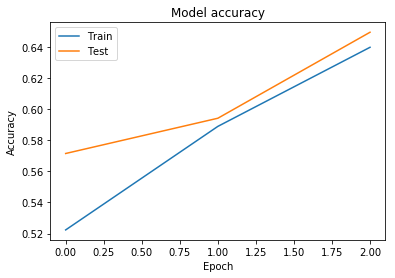

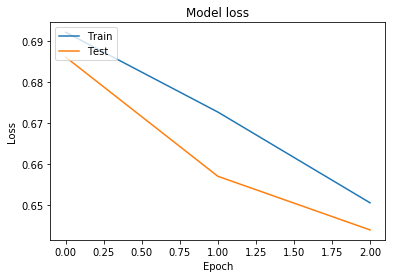

In [30]:
def plot_acc_loss(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_acc_loss(history)

### TensorBoard Accuracy and Loss Visualization 
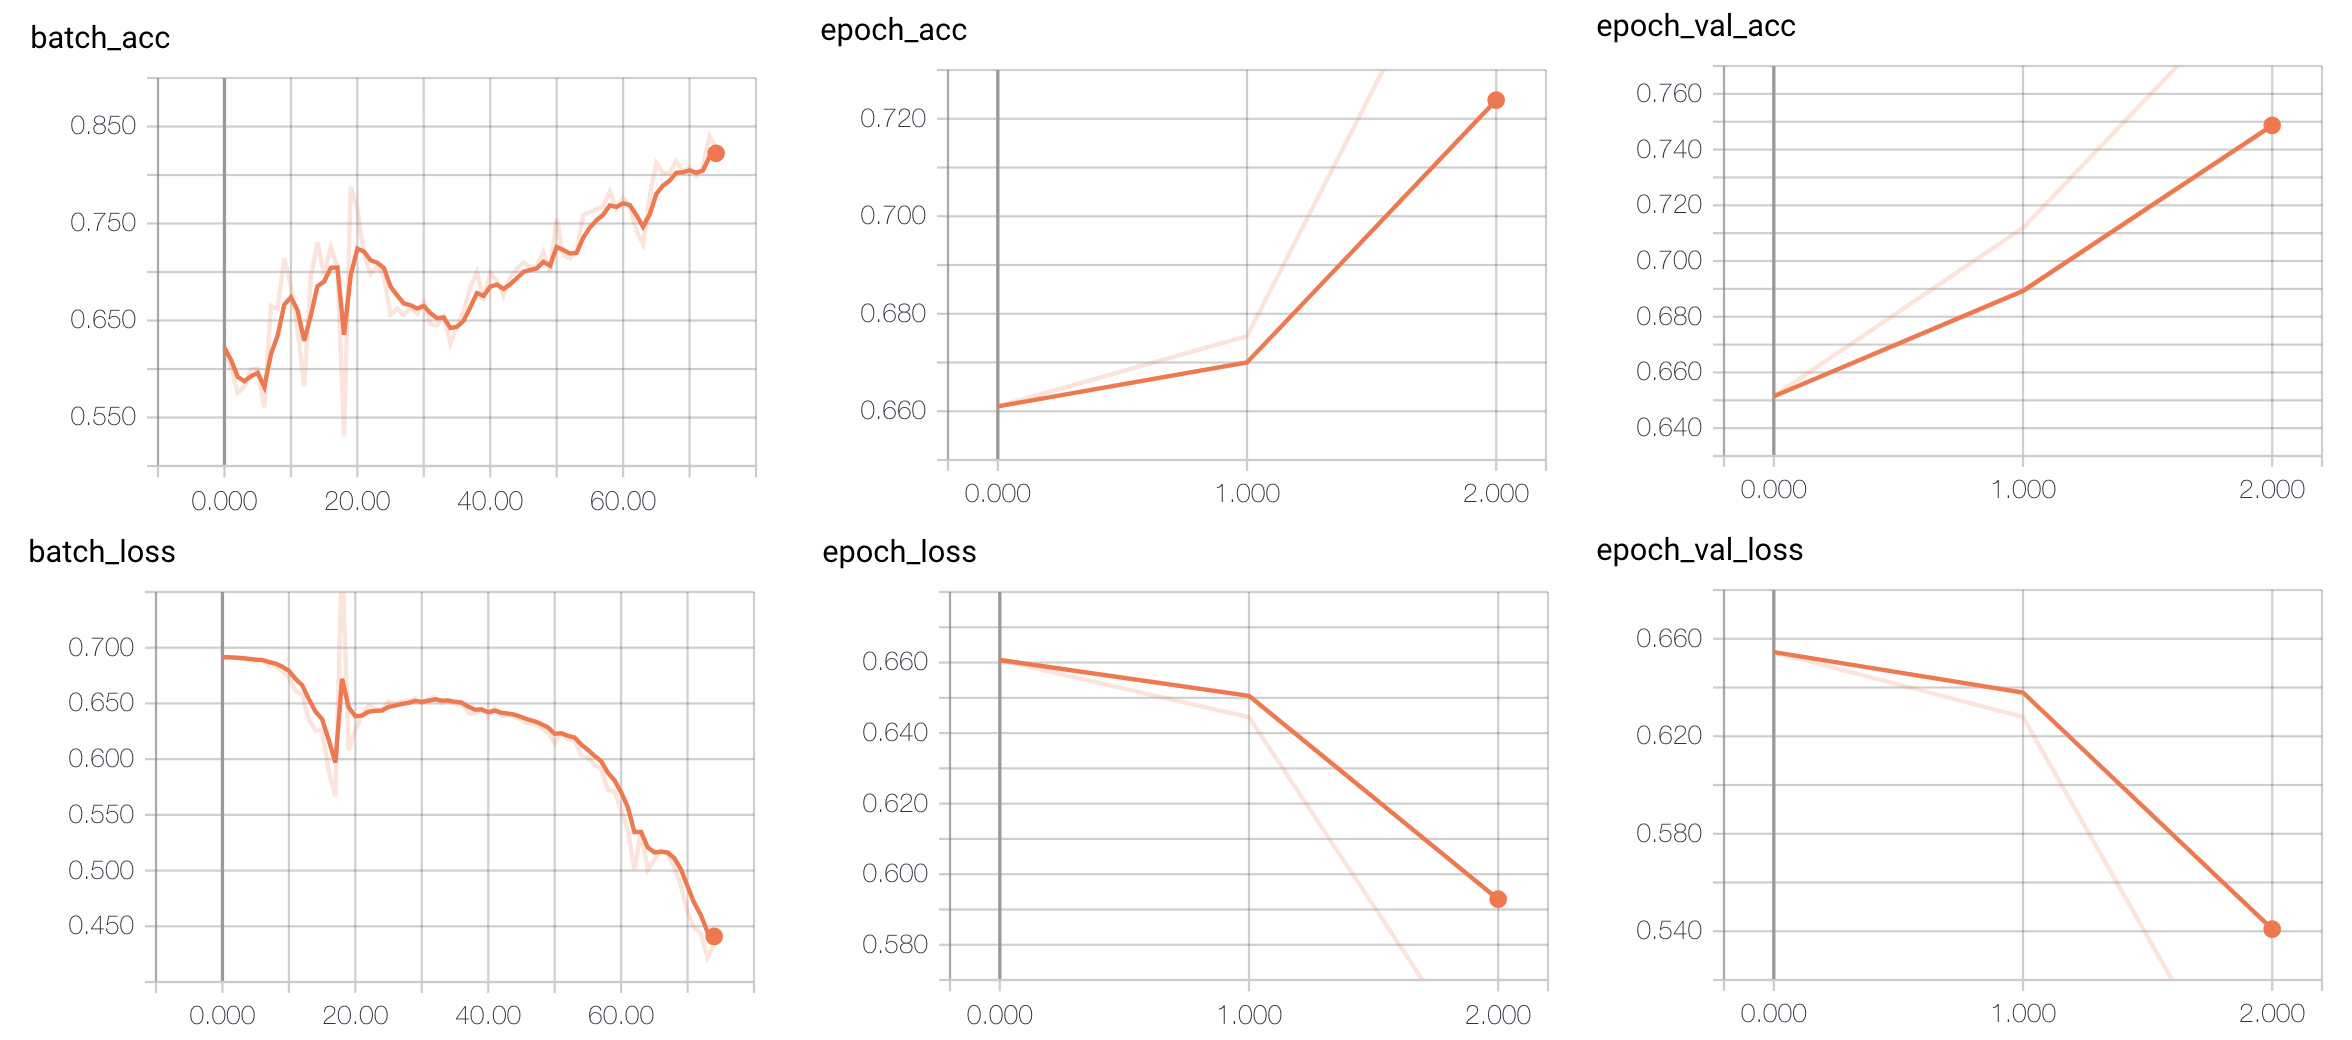

## Saving the trained model

One of the main benefits of saving the model you trained is that you are able to load the state of the optimizer in future **resume training exactly where you left off**. To save models trained you need to have `h5py` library. If you are unsure if `h5py` is installed you can run the following cell. If it imports without error it is installed otherwise you can find detailed installation instructions here: http://docs.h5py.org/en/latest/build.html


In [31]:
import h5py

## Saving/loading whole models (architecture + weights + optimizer state)

You can use `model.save(filepath)` to save a Keras model into a single HDF5 file which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

In [32]:
from tensorflow.keras.models import load_model
model.save('sentiment_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model variable in memory

# returns a compiled model
# identical to the previous one
model = load_model('sentiment_model.h5')

## Resume training for three more epochs

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 111s 4ms/step - loss: 0.6120 - acc: 0.6832 - val_loss: 0.6003 - val_acc: 0.6868
Epoch 2/3
25000/25000 [==============================] - 106s 4ms/step - loss: 0.5533 - acc: 0.7250 - val_loss: 0.5461 - val_acc: 0.7329
Epoch 3/3
25000/25000 [==============================] - 104s 4ms/step - loss: 0.4837 - acc: 0.7707 - val_loss: 0.4405 - val_acc: 0.7939


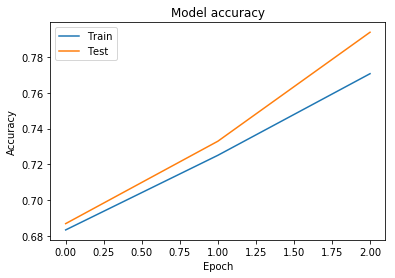

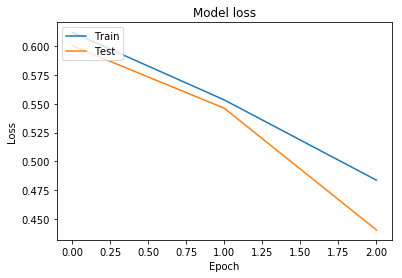

Accuracy: 79.39%


In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=1024, verbose=1, callbacks=[tensor_board])
scores = model.evaluate(X_test, y_test, verbose=0)
plot_acc_loss(history)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [34]:
model.save('sentiment_model_6_epochs.h5')  # creates a HDF5 file 'my_model_6_epochs.h5'

### Word Vector Caveats

- Word vectors are biased by the biases in the text they are trained on
- We know much more about the world than can be derived from how words are used in context: we have a lifetime of experience and are keenly aware that we live in a world of cause and effect
- Words that are used in the same context are not necessarily interchangeable (e.g. one and five, fast and slow)

# Seq2seq Models for NLP
- Sequence-to-sequence models convert one sequence to another
- They read an entire sequence (e.g. a sentence), encode it into a more general representation, then decode it into a new sequence

![Encoders/Decoders](img/The_transformer_encoders_decoders.png)

- The encoders and decoders are often RNN's
- In a standard seq2seq model for Neural Machine Translation the input and output vectors are embeddings
- RNN encoders take pairs of (input vector, previous hidden state) and the final hidden state becomes the representation to be decoded
- An RNN decoder takes pairs (output vector, previous hidden state), the output vectors taken in order being the output sequence
- The output at each step is a distribution across possible output words, so how do we choose?
  - Greedy Search: Pick the one with the highest probability
  - Ancestral Sampling: Sample from the distribution
  - Beam Search: Find the k most likely (where k is something like 5); generate k next words for each; evaluate and keep k best

# Neural Machine Translation
- Google translates over 100B words/day
- In 2014 NMT burst past other techniques
- Advantages
  - End-to-end training
  - Distributed representations allow reuse of learned language features
  - Ability to use much larger context than small-n-grams
  - Better quality results
- Google NMT 2016
  - Far better
  - Single system for all languages to languages
  - Can do an ok job of translating A to C if it knows A to B and B to C without training A to C

## Issues with the basic seq2seq model
- Embeddings like word2vec assume that collocation is important but don't make any finer distinction
- Some words in the context are much more important than others
- The words can be related in many ways: one describes another (adjectives and adverbs), one acts on another (subjects, objects, transitive verbs), one serves as a placeholder for another (pronouns)
- Relationships can be far away; they don't need to be in the same sentence
- Meaning unfurls itself slowly and retroactively; sometimes we can't understand what a sentence means until we get to the end of it; sometimes it only makes sense later or in the context of a lot that has come before
- CNN's and RNN's suffer from information and processing bottlenecks
- RNN's are:
  - slow (unparallelizable)
  - poor at using information that is not very close to the word being translated (the hidden state isn't big enough; LSTM's effectiveness drops rapidly for sentences beyond 30 words)
  - hard to interpret the meaning of the state because it entangles many previous representations
- Models without attention are usually good at producing grammatically correct output but occasionally throw in an unrelated word or antonym

## Attention
- The notion of *attention* is to have a model learn what parts of the context to pay the most attention to

![Attention](img/Attention_sentence.png)

- To overcome the context bottleneck we will pass much more information: *all* of the hidden states from the input sequence, not just the last
-  Attention uses queriable memory similar to a cross between a Map (Python dict) and a search tree
- We can query using a key and get a weighted average of matching values, weighted by how well the keys match the query
- Keys, values and queries are all tensors
- So, rather than trying to keep everything in a single context vector for the sentence we will use a tensor
- The longer the sentence, the bigger the tensor (usually one column per word in the sentence), which solves the capacity and gradient flow problem
- The embeddings of each word are typically a concatenation of the hidden states of a forward and reverse RNN at that position in the sentence
- Recurrent Attention: keys = values = input sequence; query is the hidden state from the previous step; calculates attention at each step
- Word2vec doesn't seem to work as pretraining
- Self-Attention: drop the recurrent connection; keys and values stay the same, but query becomes the current input
- Learned Self-Attention: something the model learns during training
- If we allow keys and values to be learned we move into a new area: Memory Networks e.g. Neural Turing Machines
- The attention result is a sum of the weights of the words
- The weights are a softmax of the similarity of each key and query
- Two common methods of similarity
  - Additive Similarity: Single layer neural network
  - Multiplicative Similarity: Essentially cosine similarity (faster)
- Multi-Head Attention: we can use several specialized attention mechanisms
  - Semantic
  - Grammatical
  - Tense
  - Context
- Putting syntax knowledge back in may take us to a new level again
- Typically still use LSTM but The Transformer doesn't (next) doesn't use RNN's at all

## The Transformer

- In 2017 Google showed that attention alone could outperform RNN's at translation (English to French and German)

![Encoder Stack](img/The_transformer_encoder_decoder_stack.png)

- Whereas RNN's must proceed step-by-step (word by word), the Transformer uses only a small (configurable) number of steps
- At each step it applies a self-attention mechanism to weigh the relative strength of the relationships the other words in the sentence have to the word being processed
- A weighted average of all of the current words' representations are used to produce an updated representation for the target word

![Decoder](img/Transformer_decoder.png)

- The translated sentence is generated a word at a time
- Each decoded word attends to the representations of words already translated in the sentence as well as the representations of all of the words in the sentence being translated
- The Transformer performs well on coreference resolution: where for example a pronoun could refer to either of two nouns earlier in the sentence


## Resources:

- Contextual Word Representations: A Contextual Introduction by Noah A. Smith. arXiv:1902.06006v1
- https://en.wikipedia.org/wiki/Word_embedding
- https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
- https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c
- https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning
- https://www.kaggle.com/drscarlat/imdb-sentiment-analysis-keras-and-tensorflow
- https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model
- https://medium.com/cityai/deep-learning-for-natural-language-processing-part-ii-8b2b99b3fa1e
- https://www.tensorflow.org/guide/summaries_and_tensorboard
- https://skymind.ai/wiki/attention-mechanism-memory-network
- https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html
- A Neural Attention Model for Abstractive Sentence Summarization: https://arxiv.org/abs/1509.00685
- https://fasttext.cc/
- https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/